# Vis of quarterly data

Aim of workbook is to investigate new data set: visualisations, sanity check/data checking etc

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Import data

In [2]:
df = pd.read_csv('../3_Data/master_acute.csv')

#### replace inf with Nan

In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Number of trusts

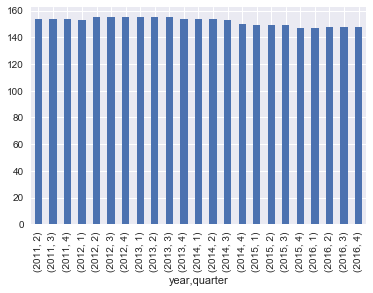

In [4]:
df.groupby(['year','quarter']).count().org_code.plot(kind='bar')

Table below gives the number of organisations reporting for each quarter(org_code) and the number of organisations submitting values for variable (v_1, v_2...)

In [5]:
df.groupby(['year','quarter']).count()

org_code  areateam  areateam_code  org  sha_code  v_4hr_targ  \
year quarter                                                                 
2011 2             154         0            154  154       151         146   
     3             154         0            154  154       154         146   
     4             154         0            154  154       154         146   
2012 1             153         0            153  153       153         146   
     2             155         0            155  155       155         148   
     3             155         0            155  155       155         148   
     4             155         0            155  155       155         148   
2013 1             155         0            155  155       155         148   
     2             155       155              0  155       155         148   
     3             155       155              0  155       155         148   
     4             154       154              0  154       154         147   
2014 1             154       154              0  154       154         147   
     2             154       154              0  154       153         147   
     3             153       153              0  153       153         146   
     4             150       150              0  150       149         143   
2015 1             149       149              0  149       149         142   
     2             149       149              0  149       149         142   
     3             149       149              0  149       148         142   
     4             147       147              0  147       147         140   
2016 1             147       147              0  147       146         140   
     2             148       148              0  148       147         141   
     3             148       148              0  148       147         141   
     4             148       148              0  148       146         141   

              v_canc_elec  v_3  v_5  v_4  v_6  
year quarter                                   
2011 2                145  145  145  151  141  
     3                148  148  148  154  145  
     4                148  148  148  154  145  
2012 1                146  147  147  153  144  
     2                148  149  149  155  146  
     3                148  149  149  155  146  
     4                148  149  149  155  146  
2013 1                148  149  149  155  146  
     2                149  149  149  155  146  
     3                148  148  148  155  145  
     4                146  147  147  154  144  
2014 1                147  147  147  154  144  
     2                146  146  146  153  143  
     3                146  146  146  153  143  
     4                142  142  142  149  139  
2015 1                142  142  142  149  139  
     2                142  142  142  149  139  
     3                141  141  141  148  138  
     4                140  140  140  147  137  
2016 1                139  139  139  146  136  
     2                142  142  142  147  139  
     3                143  143  143  147  140  
     4                142  142  142  146  140

##### can use for checks to above
df.query('year == 2011 & quarter == 2').v_2.isnull().value_counts()

### A look at missing values

In [6]:
missing = df.groupby(['year','quarter']).count().copy()

In [7]:
missing = missing.drop(missing[['areateam','areateam_code','org','sha_code']],axis=1)
missing

org_code  v_4hr_targ  v_canc_elec  v_3  v_5  v_4  v_6
year quarter                                                       
2011 2             154         146          145  145  145  151  141
     3             154         146          148  148  148  154  145
     4             154         146          148  148  148  154  145
2012 1             153         146          146  147  147  153  144
     2             155         148          148  149  149  155  146
     3             155         148          148  149  149  155  146
     4             155         148          148  149  149  155  146
2013 1             155         148          148  149  149  155  146
     2             155         148          149  149  149  155  146
     3             155         148          148  148  148  155  145
     4             154         147          146  147  147  154  144
2014 1             154         147          147  147  147  154  144
     2             154         147          146  146  146  153  143
     3             153         146          146  146  146  153  143
     4             150         143          142  142  142  149  139
2015 1             149         142          142  142  142  149  139
     2             149         142          142  142  142  149  139
     3             149         142          141  141  141  148  138
     4             147         140          140  140  140  147  137
2016 1             147         140          139  139  139  146  136
     2             148         141          142  142  142  147  139
     3             148         141          143  143  143  147  140
     4             148         141          142  142  142  146  140

In [8]:
def f(x):
    result = []
    for col in missing.columns:
        y = (1 - x[col]/x.org_code) * 100
        result.append(y)
    return(result)

In [9]:
missing.apply(f,axis=1).round(1)

org_code  v_4hr_targ  v_canc_elec  v_3  v_5  v_4  v_6
year quarter                                                       
2011 2             0.0         5.2          5.8  5.8  5.8  1.9  8.4
     3             0.0         5.2          3.9  3.9  3.9  0.0  5.8
     4             0.0         5.2          3.9  3.9  3.9  0.0  5.8
2012 1             0.0         4.6          4.6  3.9  3.9  0.0  5.9
     2             0.0         4.5          4.5  3.9  3.9  0.0  5.8
     3             0.0         4.5          4.5  3.9  3.9  0.0  5.8
     4             0.0         4.5          4.5  3.9  3.9  0.0  5.8
2013 1             0.0         4.5          4.5  3.9  3.9  0.0  5.8
     2             0.0         4.5          3.9  3.9  3.9  0.0  5.8
     3             0.0         4.5          4.5  4.5  4.5  0.0  6.5
     4             0.0         4.5          5.2  4.5  4.5  0.0  6.5
2014 1             0.0         4.5          4.5  4.5  4.5  0.0  6.5
     2             0.0         4.5          5.2  5.2  5.2  0.6  7.1
     3             0.0         4.6          4.6  4.6  4.6  0.0  6.5
     4             0.0         4.7          5.3  5.3  5.3  0.7  7.3
2015 1             0.0         4.7          4.7  4.7  4.7  0.0  6.7
     2             0.0         4.7          4.7  4.7  4.7  0.0  6.7
     3             0.0         4.7          5.4  5.4  5.4  0.7  7.4
     4             0.0         4.8          4.8  4.8  4.8  0.0  6.8
2016 1             0.0         4.8          5.4  5.4  5.4  0.7  7.5
     2             0.0         4.7          4.1  4.1  4.1  0.7  6.1
     3             0.0         4.7          3.4  3.4  3.4  0.7  5.4
     4             0.0         4.7          4.1  4.1  4.1  1.4  5.4

## Basic look at data

In [10]:
df.describe()

,year,quarter,v_4hr_targ,v_canc_elec,v_3,v_5,v_4,v_6
count,3495.000000,3495.000000,3331.000000,3334.000000,3340.000000,3340.000000,3484.000000,3271.000000
mean,2013.580830,2.564235,0.069272,1.767982,502.706517,0.135199,0.143133,1.666904
std,1.656967,1.095253,0.048333,1.753064,412.384910,0.142262,0.074972,5.793494
min,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.000000,0.038527,0.806759,250.745712,0.009397,0.090984,0.000000
50%,2014.000000,3.000000,0.051220,1.297895,394.450921,0.098054,0.132985,0.000000
75%,2015.000000,4.000000,0.088182,2.109488,625.788180,0.203836,0.179500,0.849615
max,2016.000000,4.000000,0.326382,20.000000,4054.400000,1.000000,0.602273,135.687500


In [11]:
df.groupby(['year']).describe()

quarter          v_3         v_4  v_4hr_targ         v_5  \
year                                                                      
2011 count  462.000000   441.000000  459.000000  438.000000  441.000000   
     mean     3.000000   482.793153    0.159823    0.039139    0.139044   
     std      0.817382   367.603560    0.076656    0.025660    0.154326   
     min      2.000000     0.000000    0.016871    0.001516    0.000000   
     25%      2.000000   247.490189    0.108974    0.025423    0.003175   
     50%      3.000000   385.463330    0.152408    0.036276    0.097045   
     75%      4.000000   607.564939    0.198797    0.046996    0.201507   
     max      4.000000  2444.016349    0.563636    0.284168    0.934561   
2012 count  618.000000   594.000000  618.000000  590.000000  594.000000   
     mean     2.504854   503.373108    0.145045    0.045645    0.131018   
     std      1.117480   433.473139    0.074653    0.023842    0.137296   
     min      1.000000     0.000000    0.003764    0.000322    0.000000   
     25%      2.000000   251.015177    0.095720    0.032917    0.006125   
     50%      3.000000   386.017213    0.132101    0.042629    0.093358   
     75%      3.750000   612.019939    0.181793    0.051154    0.197733   
     max      4.000000  4054.400000    0.602273    0.279420    0.741071   
2013 count  619.000000   593.000000  619.000000  591.000000  593.000000   
     mean     2.497577   492.801773    0.145150    0.054583    0.130564   
     std      1.118212   388.884503    0.073892    0.028969    0.134187   
     min      1.000000     0.000000    0.008380    0.000329    0.000000   
     25%      1.500000   246.964857    0.092317    0.037697    0.009683   
     50%      2.000000   406.482670    0.135014    0.047801    0.092654   
     75%      3.000000   641.155539    0.182699    0.064253    0.200274   
     max      4.000000  3494.000000    0.548387    0.166979    0.643519   
2014 count  611.000000   581.000000  609.000000  583.000000  581.000000   
     mean     2.489362   489.356868    0.141206    0.064739    0.138985   
     std      1.116700   355.652872    0.071645    0.036075    0.153844   
     min      1.000000     0.000000    0.016365    0.000000    0.000000   
     25%      1.000000   254.474870    0.083738    0.041653    0.015525   
     50%      2.000000   407.812500    0.133834    0.054776    0.092301   
     75%      3.000000   623.104918    0.181724    0.080995    0.200822   
     max      4.000000  2407.183594    0.465608    0.247959    1.000000   
2015 count  594.000000   565.000000  593.000000  566.000000  565.000000   
     mean     2.494949   506.567244    0.140695    0.082156    0.133460   
     std      1.117457   439.531854    0.074700    0.046660    0.137270   
     min      1.000000     0.000000    0.001994    0.000676    0.000000   
     25%      1.250000   244.470297    0.087739    0.047276    0.016012   
     50%      2.000000   390.083887    0.132255    0.070373    0.099599   
     75%      3.000000   617.096355    0.177608    0.107859    0.202891   
     max      4.000000  3478.190972    0.577308    0.267906    0.671196   
2016 count  591.000000   566.000000  586.000000  563.000000  566.000000   
     mean     2.502538   537.749248    0.130384    0.124636    0.139297   
     std      1.118221   468.591293    0.076406    0.059474    0.138609   
     min      1.000000     0.000000    0.000000    0.003855    0.000000   
     25%      2.000000   259.104085    0.078359    0.079940    0.010585   
     50%      3.000000   408.580756    0.117577    0.120716    0.110217   
     75%      3.500000   628.027285    0.161836    0.164804    0.217059   
     max      4.000000  3596.654827    0.511109    0.326382    0.678950   

                   v_6  v_canc_elec  
year                                 
2011 count  431.000000   441.000000  
     mean     1.257404     1.466633  
     std      3.104023     1.530750  
     min      0.000000     0.038048  
     25%      0.000000     0.695963 

#### function to plot median and stds

Would be better to use quartile but quartile currently broken with Nans in it!

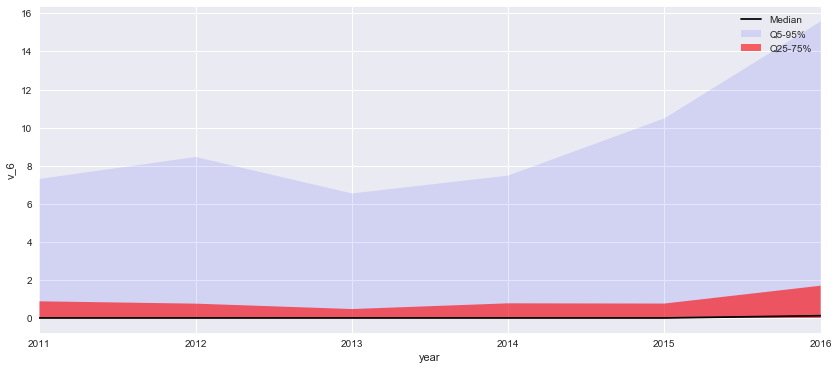

In [12]:
var = 'v_6'#'v_canc_elec'#'v_4hr_targ'

def var_plot(dta):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax = dta.groupby(['year']).median()[var].plot(color='k',label='Median') #.reset_index()
    ax.set_ylabel(var)
#    ax = dta.groupby(['year']).mean()[var].plot(color='r',label='Median') #.reset_index()
    f2 = ax.fill_between(dta.groupby(['year']).mean().index,
                (dta.groupby(['year']).quantile(0.05)[var].values),
               (dta.groupby(['year']).quantile(0.95)[var].values),
                        facecolor = 'blue', label = 'Q5-95%',alpha = 0.1)
    f1 = ax.fill_between(dta.groupby(['year']).mean().index,
                (dta.groupby(['year']).quantile(0.25)[var].values),
                (dta.groupby(['year']).quantile(0.75)[var].values),
                         facecolor = 'red', label = 'Q25-75%',alpha = 0.6)

    
    ax.legend()
    return

var_plot(df)

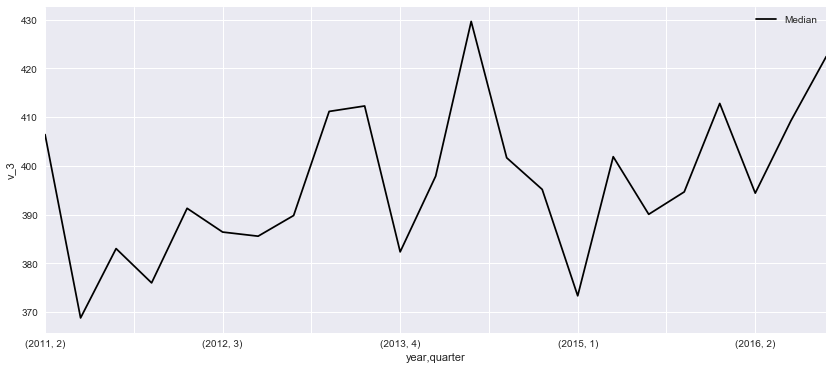

In [13]:
var = 'v_3'

def var_plot2(dta):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax = dta.groupby(['year','quarter']).median()[var].plot(color='k',label='Median') #.reset_index()
    ax.set_ylabel(var)
#    f2 = ax.fill_between(dta.groupby(['year','quarter']).median().index,
#                         dta.groupby(['year','quarter']).quantile(0.05)[var].values,
#                         dta.groupby(['year','quarter']).quantile(0.95)[var].values,
#                         facecolor = 'blue', label = 'Q5-95%',alpha = 0.3)
#    f1 = ax.fill_between(dta.groupby(['year','quarter']).mean().index,
#                (dta.groupby(['year','quarter']).quantile(0.25)[var].values),
#                (dta.groupby(['year','quarter']).quantile(0.75)[var].values),
#                         facecolor = 'red', label = 'Q25-75%',alpha = 0.8)
    
    
    ax.legend()
    return

var_plot2(df)

In [14]:
df

,year,quarter,org_code,areateam,areateam_code,org,sha_code,v_4hr_targ,v_canc_elec,v_3,v_5,v_4,v_6
0,2016,4,RF4,London Commissioning Region,NaN,"Barking, Havering And Redbridge University Hos...",Y56,0.129234,2.797023,842.820739,0.122619,0.079995,0.266936
1,2016,4,R1H,London Commissioning Region,NaN,Barts Health NHS Trust,Y56,0.147326,1.387043,434.879115,0.192060,0.106692,0.060930
2,2016,4,RQM,London Commissioning Region,NaN,Chelsea And Westminster Hospital NHS Foundatio...,Y56,0.096725,0.445305,721.166398,0.054211,0.067919,0.000000
3,2016,4,RJ6,London Commissioning Region,NaN,Croydon Health Services NHS Trust,Y56,0.143653,2.607710,786.746032,0.000567,0.047410,0.000000
4,2016,4,RVR,London Commissioning Region,NaN,Epsom And St Helier University Hospitals NHS T...,Y56,0.043159,1.166894,253.110426,0.000000,0.217588,0.013185
5,2016,4,RJ1,London Commissioning Region,NaN,Guy's And St Thomas' NHS Foundation Trust,Y56,0.134048,1.440811,402.435375,0.217411,0.188168,0.000000
6,2016,4,RQX,London Commissioning Region,NaN,Homerton University Hospital NHS Foundation Trust,Y56,0.065248,1.335176,1933.271596,0.281963,0.208174,2.670352
7,2016,4,RYJ,London Commissioning Region,NaN,Imperial College Healthcare NHS Trust,Y56,0.140575,0.882341,329.750049,0.280057,0.144727,0.000000
8,2016,4,RJZ,London Commissioning Region,NaN,King's College Hospital NHS Foundation Trust,Y56,0.211199,1.231574,340.362722,0.130841,0.050762,0.358619
9,2016,4,RAX,London Commissioning Region,NaN,Kingston Hospital NHS Foundation Trust,Y56,0.121580,0.867329,474.981145,0.000000,0.033438,0.000000


# Outliers

C:\Anaconda3\envs\stable2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


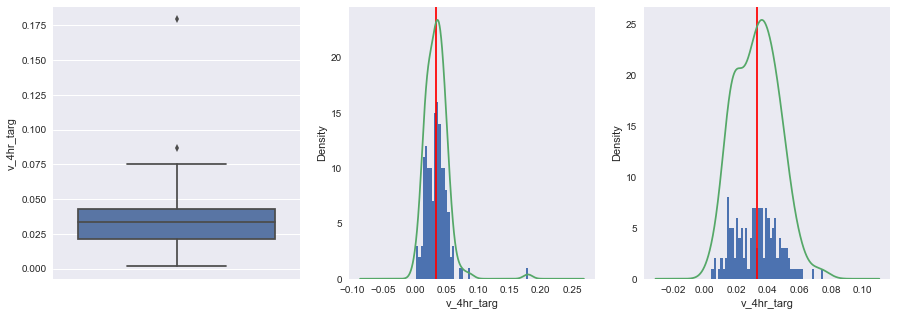

In [23]:
def plot_outliers(df,year,quarter,x_var):
    dff = df[(df['year'] == year) & (df['quarter'] == quarter)].copy()
    
    #### Remove rows containing nan in x_var column (otherwise error with ln calcs)
    dff.replace([np.inf, -np.inf], np.nan, inplace=True)
    dff = dff[dff[x_var].notnull()]
    
    fig2 = plt.figure(figsize=(15,5))
    
    #### y_var1
    ## scatter and regression line for y_var1
    ax1 = plt.subplot(131)
    ax1 = sns.boxplot(dff[x_var], vert=True)
    
    ax2 = plt.subplot(132)
    ax2 = dff[x_var].plot(kind='hist',bins=50)
    ax2.axvline(dff[x_var].median(),color= 'r',label='median')
    ax2.set_xlabel(x_var)
    ax2 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
    
    #### filter out outliers
    low = 0.01
    high = 0.99
    quant_df = dff[x_var].quantile([low, high])
    ## make mask for all 3vars
    
    
    #((df.regiment != 'Nighthawks') & (df['size'] > 986) )
    
    dff = dff.loc[dff[(dff[x_var] > quant_df.values.min()) & (dff[x_var] < quant_df.values.max())].index]
    
    #print(quant_df)
    #print(dff[x_var].shape)
    #print(quant_df.min())
    #dff = dff[x_var] > 
    #dff[x_var].map(lambda x: x[(x>quant_df.min()) & (x < quant_df.max())])
    
    #### plot new dataset
    ax3 = plt.subplot(133)
    ax3 = dff[x_var].plot(kind='hist',bins=50)
    ax3.axvline(dff[x_var].median(),color= 'r',label='median')
    ax3.set_xlabel(x_var)
    ax3 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
    
    return(quant_df)

test = plot_outliers(df,2011,3,'v_4hr_targ')

C:\Anaconda3\envs\stable2\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


Trusts before:  154
Trusts after:  133
Perc removed:  13.636363636363637


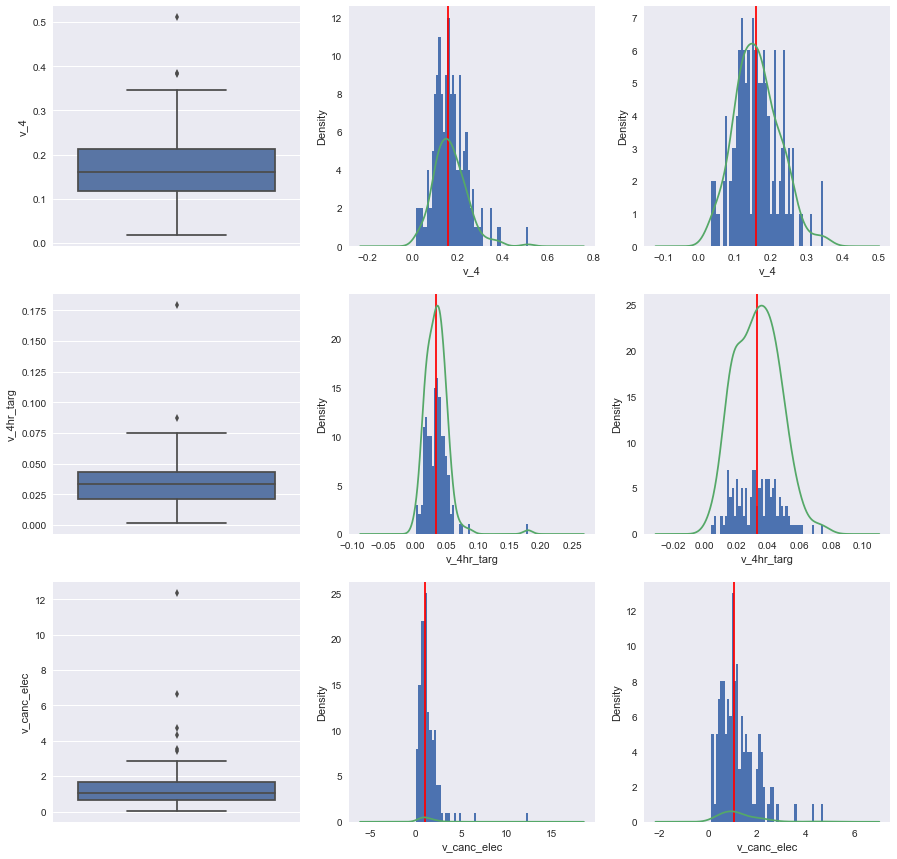

In [55]:
def plot_outliers(df,year,quarter,x_var):
    """
    plot outliers and then filter and remove them
    """
    y_var1 = 'v_4hr_targ'
    y_var2 = 'v_canc_elec'
    
    dff = df[(df['year'] == year) & (df['quarter'] == quarter)].copy()
    
    #### Remove rows containing nan in x_var column (otherwise error with ln calcs)
    dff.replace([np.inf, -np.inf], np.nan, inplace=True)
    dff = dff[dff[x_var].notnull()]
    
    fig2 = plt.figure(figsize=(15,15))
    
    #### Scatters of original data
    ## scatter and regression line for x_var
    ax1 = plt.subplot(331)
    ax1 = sns.boxplot(dff[x_var], vert=True)
    
    ax2 = plt.subplot(332)
    ax2 = dff[x_var].plot(kind='hist',bins=50)
    ax2.axvline(dff[x_var].median(),color= 'r',label='median')
    ax2.set_xlabel(x_var)
    ax2 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
    
    ## y_var1
    ax4 = plt.subplot(334)
    ax4 = sns.boxplot(dff[y_var1], vert=True)
    ax5 = plt.subplot(335)
    ax5 = dff[y_var1].plot(kind='hist',bins=50)
    ax5.axvline(dff[y_var1].median(),color= 'r',label='median')
    ax5.set_xlabel(y_var1)
    ax5 = dff[y_var1].plot(kind='kde', grid=False,label='KDE')
    
    ## y_var2
    ax7 = plt.subplot(337)
    ax7 = sns.boxplot(dff[y_var2], vert=True)
    ax8 = plt.subplot(338)
    ax8 = dff[y_var2].plot(kind='hist',bins=50)
    ax8.axvline(dff[y_var2].median(),color= 'r',label='median')
    ax8.set_xlabel(y_var2)
    ax8 = dff[y_var2].plot(kind='kde', grid=False,label='KDE')
    
    
    #### filter out outliers
    low = 0.01
    high = 0.99
    quant_df = dff.quantile([low, high])
    ## make mask for all 3vars
    quant_mask = ( (dff[x_var] > quant_df[x_var].values.min()) & (dff[x_var] < quant_df[x_var].values.max()) &
                  (dff[y_var1] > quant_df[y_var1].values.min()) & (dff[y_var1] < quant_df[y_var1].values.max()) &
                  (dff[y_var2] > quant_df[y_var2].values.min()) & (dff[y_var2] < quant_df[y_var2].values.max())
                 )
    
    
    
    #((df.regiment != 'Nighthawks') & (df['size'] > 986) )
    size_1 = dff.shape[0]
    dff = dff.loc[dff[quant_mask].index]
    size_2 = dff.shape[0]
    
    print('Trusts before: ', size_1)
    print('Trusts after: ', size_2)
    print('Perc removed: ', (100*(size_1 - size_2)/size_1))
    
    #print(quant_df)
    #print(dff[x_var].shape)
    #print(quant_df.min())
    #dff = dff[x_var] > 
    #dff[x_var].map(lambda x: x[(x>quant_df.min()) & (x < quant_df.max())])
    
    #### plot new datasets
    ax3 = plt.subplot(333)
    dff[x_var].plot(kind='hist',bins=50)
    ax3.axvline(dff[x_var].median(),color= 'r',label='median')
    ax3.set_xlabel(x_var)
    ax3 = dff[x_var].plot(kind='kde', grid=False,label='KDE')
    
    ax6 = plt.subplot(336)
    dff[y_var1].plot(kind='hist',bins=50)
    ax6.axvline(dff[y_var1].median(),color= 'r',label='median')
    ax6.set_xlabel(y_var1)
    ax6 = dff[y_var1].plot(kind='kde', grid=False,label='KDE')
    
    ax9 = plt.subplot(339)
    dff[y_var2].plot(kind='hist',bins=50)
    ax9.axvline(dff[y_var2].median(),color= 'r',label='median')
    ax9.set_xlabel(y_var2)
    ax9 = dff[y_var2].plot(kind='kde', grid=False,label='KDE')
    
    
    
    return(quant_df)

test = plot_outliers(df,2011,3,'v_4')

In [ ]:
sns.plot()

In [31]:
test['v_3']

0.01     128.639691
0.99    1598.581022
Name: v_3, dtype: float64

# Dev

In [15]:
break

SyntaxError: 'break' outside loop (<ipython-input-15-b20fcc2397e7>, line 1)

In [118]:
test.values.min()

0.011515593210602432

In [ ]:
dff = df[(df['year'] == year) & (df['quarter'] == quarter)].copy()

In [85]:
test.shape

(146, 13)

In [91]:
test.v_4.quantile([0.05,.95])

0.05    0.069036
0.95    0.264978
Name: v_4, dtype: float64

In [105]:
test[(test.v_4 > 0.069036) & (test.v_4 < 0.264978)].index

Int64Index([3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3197, 3198,
            ...
            3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340],
           dtype='int64', length=130)

In [108]:
test.loc[test[(test.v_4 > 0.069036) & (test.v_4 < 0.264978)].index]

,year,quarter,org_code,areateam,areateam_code,org,sha_code,v_4hr_targ,v_canc_elec,v_3,v_5,v_4,v_6
3187,2011,3,RLN,NaN,Q30,CITY HOSPITALS SUNDERLAND NHS FOUNDATION TRUST,Q30,0.034880,NaN,NaN,NaN,0.212131,NaN
3188,2011,3,RXP,NaN,Q30,COUNTY DURHAM AND DARLINGTON NHS FOUNDATION TRUST,Q30,0.015433,0.653254,460.900039,0.106903,0.237706,0.660513
3189,2011,3,RR7,NaN,Q30,GATESHEAD HEALTH NHS FOUNDATION TRUST,Q30,0.031468,0.192308,202.076923,0.182832,0.183404,0.000000
3190,2011,3,RVW,NaN,Q30,NORTH TEES AND HARTLEPOOL NHS FOUNDATION TRUST,Q30,0.018311,0.188387,303.504461,0.000000,0.239864,0.000000
3191,2011,3,RTF,NaN,Q30,NORTHUMBRIA HEALTHCARE NHS FOUNDATION TRUST,Q30,0.014209,0.240812,410.826092,0.154329,0.252024,0.000000
3192,2011,3,RTR,NaN,Q30,SOUTH TEES HOSPITALS NHS FOUNDATION TRUST,Q30,0.017278,0.907257,279.781391,0.492849,0.187282,0.000000
3193,2011,3,RE9,NaN,Q30,SOUTH TYNESIDE NHS FOUNDATION TRUST,Q30,0.013582,1.000000,907.132075,0.453035,0.194627,0.641509
3194,2011,3,RTD,NaN,Q30,THE NEWCASTLE UPON TYNE HOSPITALS NHS FOUNDATI...,Q30,0.004433,0.567929,182.167543,0.201013,0.213985,1.810272
3197,2011,3,RXL,NaN,Q31,BLACKPOOL TEACHING HOSPITALS NHS FOUNDATION TRUST,Q31,0.035498,1.304374,341.648869,0.247662,0.105004,2.456109
3198,2011,3,RMC,NaN,Q31,BOLTON NHS FOUNDATION TRUST,Q31,0.034160,1.708053,826.270596,0.100487,0.182532,0.000000


# Hist

KeyError: 'v_1'

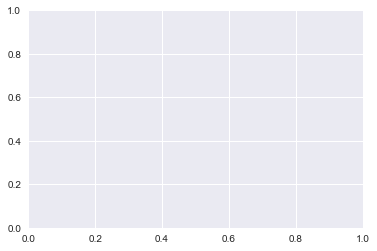

In [26]:
var = 'v_1'
#### histogram
ax1 = plt.subplot(111)
#np.log(df[var])
df[var].plot(kind = 'hist', bins = 50)
ax1.axvline(df[var].median(),color= 'r',label='median')
ax1.set_xlabel(var)
ax1 = df[var].plot(kind='kde', grid=False,label='KDE')
#ax2.legend(loc='upper left',frameon= True)
#ax2.set_title('distribution of: %s' % (dv1_n))

In [23]:
x = np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
np.log(x)

C:\Anaconda3\envs\stable2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


array([       -inf,  0.        ,  0.69314718,  1.09861229,  1.38629436,
        1.60943791,  1.79175947,  1.94591015,  2.07944154,  2.19722458])

In [26]:
np.log(df[var])

C:\Anaconda3\envs\stable2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


0      -2.046128
1      -1.915105
2      -2.335887
3      -1.940357
4      -3.142866
5      -2.009558
6      -2.729558
7      -1.962011
8      -1.554954
9      -2.107180
10     -1.733700
11     -4.124773
12     -1.797954
13           NaN
14     -1.875379
15           NaN
16     -2.520058
17     -1.693697
18     -1.991435
19     -1.968111
20     -2.313747
21     -2.306848
22     -2.527482
23           NaN
24     -2.302086
25     -1.654362
26     -2.110612
27     -1.671200
28     -2.053741
29     -2.086458
          ...   
3465   -3.597466
3466   -5.402677
3467   -2.606908
3468   -1.282607
3469   -3.493593
3470   -3.328524
3471   -3.586657
3472   -3.403080
3473   -3.009753
3474   -3.093748
3475   -3.730034
3476   -3.293507
3477   -3.106697
3478   -3.788819
3479   -2.800184
3480   -3.208872
3481   -3.659328
3482   -4.389254
3483   -3.287741
3484   -3.904068
3485   -3.234675
3486   -2.666420
3487   -3.348062
3488   -3.634988
3489   -4.176643
3490   -2.740219
3491   -3.351683
3492   -3.9382

# Dev

In [15]:
error here

SyntaxError: invalid syntax (<ipython-input-15-59a12946ea69>, line 1)

In [127]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'deaths', 'battles', 'size', 'veterans', 'readiness', 'armored', 'deserters', 'origin'])

df = df.set_index('origin')

df

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2


In [139]:
((df.regiment != 'Nighthawks'))# & (df.company != '1st') ) #| (df.armored == 1))

origin
Arizona       False
California    False
Texas         False
Florida       False
Maine          True
Iowa           True
Alaska         True
Washington     True
Oregon         True
Wyoming        True
Louisana       True
Georgia        True
Name: regiment, dtype: bool

In [146]:
df['size'] > 986

origin
Arizona        True
California    False
Texas          True
Florida        True
Maine          True
Iowa           True
Alaska         True
Washington    False
Oregon        False
Wyoming        True
Louisana       True
Georgia        True
Name: size, dtype: bool

In [147]:
((df.regiment != 'Nighthawks') & (df['size'] > 986) ) #| (df.armored == 1))

origin
Arizona       False
California    False
Texas         False
Florida       False
Maine          True
Iowa           True
Alaska         True
Washington    False
Oregon        False
Wyoming        True
Louisana       True
Georgia        True
dtype: bool

In [ ]:
import sys

In [ ]:
sys.version

In [ ]:
numpy.__version__

In [ ]:
pd.__version__

In [ ]:
import pandas as pd
import numpy
s = pd.Series([1, 2, 3, 4, numpy.nan])
s.quantile([0.5,0.2])
#nan

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = dta.groupby(['period_name']).median().a_e_4hr_perc.plot(color='k', label = 'Median value')
#ax = dta.groupby(['period_name']).mean().a_e_4hr_perc.plot(color = 'r', linestyle ='--', label = 'Mean value')

f1 = ax.fill_between(dta.groupby(['period_name']).mean().index,
                dta.groupby(['period_name']).quantile(q=0.20).a_e_4hr_perc.values,
                dta.groupby(['period_name']).quantile(q=0.80).a_e_4hr_perc.values, facecolor = '0.75', label = '20-80% quartile range')

f2 = ax.fill_between(dta.groupby(['period_name']).mean().index,
                dta.groupby(['period_name']).quantile(q=0.40).a_e_4hr_perc.values,
                dta.groupby(['period_name']).quantile(q=0.60).a_e_4hr_perc.values, facecolor = '0.6', label = '40-60% quartile range')

ax.set_xlabel('Time period')
ax.set_ylabel('Patients seen within 4 hrs of arrival')
ax.legend(loc = 3, frameon = True)
plt.title('Change in 4hr target performance over time (acute unit depts only)')
#ax.legend([f1, f2], ['yes', 'no'],loc = 3, frameon = True)

#ax = dta.groupby(['period_name']).std().a_e_4hr_perc.plot()
#ax = dta.groupby(['period_name']).quantile(q=0.75).a_e_4hr_perc.plot()
#ax = dta.groupby(['period_name']).quantile(q=0.25).a_e_4hr_perc.plot()
